In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import median
from scipy import interpolate

In [22]:
df = pd.read_csv('data.csv')
cols = []
cols = df.columns

dx20cm Gaussian profile:
Width is 1.2891648255707586 mm - -1.168544088445403 mm = 2.4577089140161616 mm


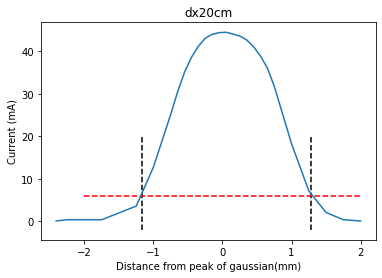

dy20cm Gaussian profile:
Width is 1.1268920196581786 mm - -1.3219759158520399 mm = 2.4488679355102185 mm


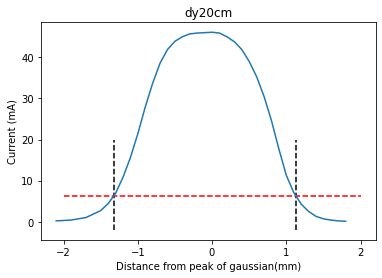

dx40cm Gaussian profile:
Width is 1.54249704191089 mm - -1.2371056056674405 mm = 2.7796026475783306 mm


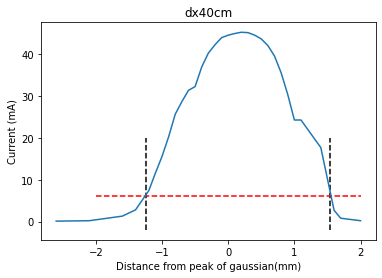

dy40cm Gaussian profile:
Width is 1.4415071308918166 mm - -0.9567172980498478 mm = 2.3982244289416643 mm


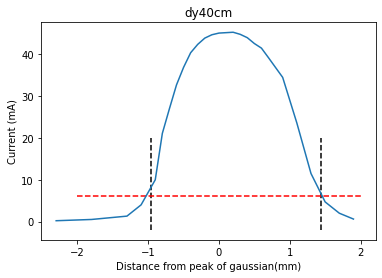

In [23]:
it = iter(cols)
for col in it:
    x = df[col].to_numpy()
    y = df[next(it)].to_numpy()
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]

    med = median(x)
    max_x = max(x)
    peak = np.amax(y)
    width_level = peak/(np.e)**2

    widths = interpolate.InterpolatedUnivariateSpline(x-med, y - width_level)
    print(col + ' Gaussian profile:')
    print(f"Width is {widths.roots()[1]} mm - {widths.roots()[0]} mm = {widths.roots()[1] - widths.roots()[0]} mm")

    plt.vlines(widths.roots()[0], -2, 20, linestyles='dashed', colors = 'k')
    plt.vlines(widths.roots()[1], -2, 20, linestyles='dashed', colors = 'k')
    plt.hlines(width_level, -2,2, linestyles='dashed', colors='r')
    plt.xlabel('Distance from peak of gaussian(mm)')
    plt.ylabel('Current (mA)')
    plt.title(col)
    plt.xticks(np.linspace(-2,2,5))
    plt.plot(x - med, y)
    plt.savefig(col + '.jpg', dpi=200)
    plt.show()
